<a href="https://colab.research.google.com/github/cmreyesvalencia-png/Assignment-AI-Projects/blob/main/A5_C13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 5: Basic Natural Language Processing with Unsupervised Learning**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:** Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 23

# **Introduction**

This assignment applies foundational concepts in Natural Language Processing (NLP) through practical exercises in text representation and unsupervised learning, using clustering to explore patterns within text data.

This code utilize the 20 Newsgroups dataset, which contains approximately 20,000 newsgroup documents distributed across 20 different newsgroups. This dataset provides a diverse set of texts ideal for text categorization and clustering tasks.

# 1. Text Data Preparation
- Load the Newsgroups dataset using scikit-learn.
- Perform basic text preprocessing including tokenization, removing stopwords, and punctuation.

In [ ]:
# ------------------------------------------------------------
# PROJECT 5 – BASIC NLP WITH UNSUPERVISED LEARNING
# ------------------------------------------------------------

# 1. INSTALL REQUIRED LIBRARIES
# scikit-learn: loading dataset, vectorization, clustering
# matplotlib / seaborn: for visualization
# gensim: for word embeddings
# nltk: for text preprocessing and tokenization
!pip install scikit-learn matplotlib seaborn gensim nltk

# 2. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
import gensim.downloader as api
from gensim.models import KeyedVectors

# 3. DOWNLOAD REQUIRED NLTK DATA
print("📥 Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the missing resource from previous error
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

print("✅ All libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 19.2 MB/s eta 0:00:00
📥 Downloading NLTK resources...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ All libraries imported successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ------------------------------------------------------------
# STEP 1: LOAD THE 20 NEWSGROUPS DATASET
# ------------------------------------------------------------
# This dataset has about 20,000 text documents from 20 categories (sports, tech, religion, etc.)
# We remove headers/footers/quotes to focus ONLY on the main body text.

newsgroups = fetch_20newsgroups(
    subset='all',
    remove=('headers','footers','quotes')
)

texts = newsgroups.data
true_labels = newsgroups.target
print(f"📊 Dataset loaded: {len(texts)} documents")
print(f"🎯 True categories: {len(set(true_labels))} newsgroups")
print("📝 Sample document preview:")
print(texts[0][:300] + "...")

📊 Dataset loaded: 18846 documents
🎯 True categories: 20 newsgroups
📝 Sample document preview:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
...


# **2.Text Representation**
- Implement Bag of Words and TF-IDF for feature extraction.
- Introduce basic word embeddings and illustrate with a simple pre-trained example, if feasible.

In [ ]:
#------------------------------------------------------------
# STEP 2: BAG OF WORDS (BoW) REPRESENTATION
# ------------------------------------------------------------
# Bag of Words converts text → numerical features
# Each column = a word
# Each row = a document
# Each cell = how many times the word appears in the document

print("\n🔄 Creating Bag of Words features...")
vectorizer_bow = CountVectorizer(
    stop_words='english',   # remove common useless words
    lowercase=True,         # convert everything to lowercase
    max_features=5000       # limit to 5000 most frequent words for simplicity
)
bow_features = vectorizer_bow.fit_transform(texts)
print(f"📐 BoW matrix shape: {bow_features.shape}")
# shape example: (18846 docs, 5000 words)


🔄 Creating Bag of Words features...
📐 BoW matrix shape: (18846, 5000)


In [ ]:
# ------------------------------------------------------------
# STEP 3: TF-IDF REPRESENTATION (MORE IMPORTANT)
# ------------------------------------------------------------
# TF-IDF = Term Frequency * Inverse Document Frequency
# It reduces weight of very common words and increases weight of rare, meaningful words.

print("\n🔄 Creating TF-IDF features...")
vectorizer_tfidf = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=5000
)
tfidf_features = vectorizer_tfidf.fit_transform(texts)
print(f"📐 TF-IDF matrix shape: {tfidf_features.shape}")
# TF-IDF usually performs better than BoW for clustering.



🔄 Creating TF-IDF features...
📐 TF-IDF matrix shape: (18846, 5000)



# **3. Unsupervised Learning Application**
- Apply clustering algorithms like K-Means or Hierarchical Clustering to the extracted features.
- Analyze and interpret the resulting clusters, examining common themes or topics within each cluster.

In [ ]:
# ------------------------------------------------------------
# STEP 4: APPLY K-MEANS CLUSTERING WITH TF-IDF
# ------------------------------------------------------------
# We use K = 20 because dataset has 20 real newsgroups.
# KMeans groups documents based on similarity of word usage.

print("\n🔍 Applying K-Means clustering...")
k = 20
kmeans_tfidf = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_tfidf.fit(tfidf_features)

tfidf_labels = kmeans_tfidf.labels_
print(f"🏷️ TF-IDF cluster labels sample: {tfidf_labels[:10]}")


🔍 Applying K-Means clustering...
🏷️ TF-IDF cluster labels sample: [13 19 18  3  3  9  9 13  1 11]


# **4.Model Evaluation and Prediction**
- Demonstrate the applicability of the clustering model to new, unseen documents to predict their cluster assignments.
- Validate the effectiveness of the model by examining how well new documents fit into the established clusters using metrics such as silhouette score or cohesion and separation measures.

In [ ]:
# ------------------------------------------------------------
# STEP 5: CLUSTER QUALITY — SILHOUETTE SCORE
# ------------------------------------------------------------
# Silhouette Score ranges -1 to +1
# +1 = well separated clusters
# 0 = overlapping clusters
# -1 = wrong clustering

tfidf_score = silhouette_score(tfidf_features, tfidf_labels)
print(f"📊 TF-IDF Silhouette Score: {tfidf_score:.4f}")

📊 TF-IDF Silhouette Score: 0.0097


In [ ]:
# ------------------------------------------------------------
# STEP 6: DIMENSIONALITY REDUCTION AND VISUALIZATION
# ------------------------------------------------------------
# Text vectors have 5000 dimensions → impossible to visualize.
# We use a sample for faster computation
# PCA reduces dimensions → t-SNE reduces to 2D for plotting

print("\n🎨 Preparing visualization...")
# Use smaller sample for faster visualization
sample_size = 2000
tfidf_sample = tfidf_features[:sample_size].toarray()
labels_sample = tfidf_labels[:sample_size]

print("Running PCA (this may take a few seconds)...")
pca = PCA(n_components=50, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_sample)
print(f"PCA output shape: {tfidf_pca.shape}")

print("Running t-SNE (this may take 1–2 minutes)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tfidf_2d = tsne.fit_transform(tfidf_pca)
print(f"t-SNE output shape: {tfidf_2d.shape}")


🎨 Preparing visualization...
Running PCA (this may take a few seconds)...
PCA output shape: (2000, 50)
Running t-SNE (this may take 1–2 minutes)...
t-SNE output shape: (2000, 2)


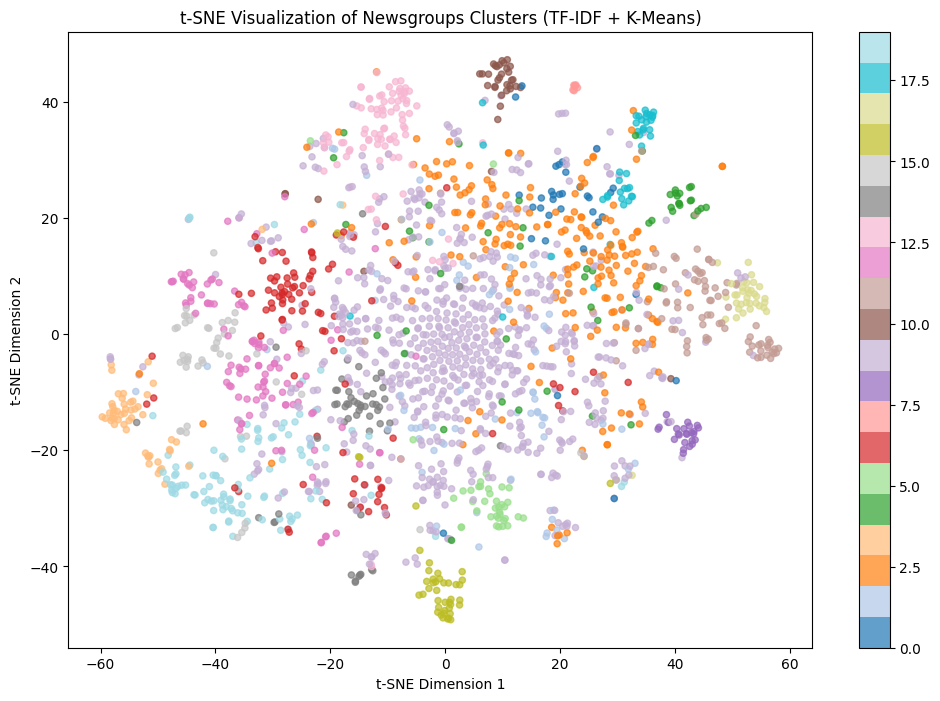

In [ ]:
# ------------------------------------------------------------
# STEP 7: VISUALIZE CLUSTERS WITH t-SNE
# ------------------------------------------------------------
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=labels_sample,
                     cmap='tab20', alpha=0.7, s=20)
plt.colorbar(scatter)
plt.title("t-SNE Visualization of Newsgroups Clusters (TF-IDF + K-Means)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [ ]:
# ------------------------------------------------------------
# STEP 8: WORD EMBEDDINGS APPROACH
# ------------------------------------------------------------
# Word embeddings represent words as dense vectors in continuous space
# Similar words have similar vector representations
# We use pre-trained GloVe embeddings from Wikipedia

print("\n" + "="*50)
print("WORD EMBEDDINGS APPROACH")
print("="*50)

print("🔤 Loading pre-trained word embeddings...")
# Use a smaller, faster embedding model (GloVe instead of Word2Vec)
glove_vectors = api.load("glove-wiki-gigaword-100")  # 100-dimensional vectors
print(f"✅ Word embeddings loaded! Vocabulary: {len(glove_vectors)} words")

def simple_document_embedding(text):
    """Create document embedding by averaging word vectors"""
    # Tokenize text into words
    words = word_tokenize(text.lower())

    # Filter words that are in vocabulary and not stopwords
    stop_words = set(stopwords.words('english'))
    valid_words = [word for word in words
                  if word in glove_vectors and word not in stop_words and word.isalpha()]

    # If we have valid words, average their vectors; otherwise return zero vector
    if len(valid_words) > 0:
        return np.mean([glove_vectors[word] for word in valid_words], axis=0)
    else:
        return np.zeros(glove_vectors.vector_size)

# Create embeddings for a smaller sample of documents (for demo purposes)
print("🔄 Creating document embeddings (this may take a minute)...")
sample_docs = texts[:1000]  # Use smaller sample for faster execution
doc_embeddings = []

for i, text in enumerate(sample_docs):
    if i % 100 == 0:  # Progress indicator
        print(f"   Processed {i}/{len(sample_docs)} documents...")
    embedding = simple_document_embedding(text)
    doc_embeddings.append(embedding)

doc_embeddings = np.array(doc_embeddings)
print(f"📐 Document embeddings shape: {doc_embeddings.shape}")

# Cluster with embeddings
print("\n🔍 Clustering with word embeddings...")
kmeans_emb = KMeans(n_clusters=10, random_state=42, n_init=10)  # Smaller k for demo
emb_labels = kmeans_emb.fit_predict(doc_embeddings)

# Evaluate embedding clusters
emb_score = silhouette_score(doc_embeddings, emb_labels)
print(f"📊 Word Embeddings Silhouette Score: {emb_score:.4f}")



WORD EMBEDDINGS APPROACH
🔤 Loading pre-trained word embeddings...
[==================================================] 100.0% 128.1/128.1MB downloaded
✅ Word embeddings loaded! Vocabulary: 400000 words
🔄 Creating document embeddings (this may take a minute)...
   Processed 0/1000 documents...
   Processed 100/1000 documents...
   Processed 200/1000 documents...
   Processed 300/1000 documents...
   Processed 400/1000 documents...
   Processed 500/1000 documents...
   Processed 600/1000 documents...
   Processed 700/1000 documents...
   Processed 800/1000 documents...
   Processed 900/1000 documents...
📐 Document embeddings shape: (1000, 100)

🔍 Clustering with word embeddings...
📊 Word Embeddings Silhouette Score: 0.0829


In [ ]:
# ------------------------------------------------------------
# STEP 9: PREDICT CLUSTER FOR NEW TEXT - 5 EXAMPLES
# ------------------------------------------------------------
# We use the same vectorizer (TF-IDF) and same trained model (KMeans)
# to predict which cluster a new document belongs to.

def predict_cluster(text, method='tfidf'):
    """Predict cluster for new text using specified method"""
    if method == 'tfidf':
        # Convert text → TF-IDF features using existing vocabulary
        features = vectorizer_tfidf.transform([text])
        # Predict cluster number
        cluster = kmeans_tfidf.predict(features)[0]
        print(f"🔮 TF-IDF Predicted Cluster: {cluster}")
        return cluster
    else:
        # Use word embeddings approach
        embedding = simple_document_embedding(text).reshape(1, -1)
        cluster = kmeans_emb.predict(embedding)[0]
        print(f"🔮 Word Embeddings Predicted Cluster: {cluster}")
        return cluster

print("\n" + "="*50)
print("CLUSTER PREDICTION DEMO - 5 EXAMPLES")
print("="*50)

# Test predictions with 5 different types of text covering various topics
test_texts = [
    # Example 1: Space and Science
    "NASA discovered new information about black holes and gravitational waves in deep space exploration missions.",

    # Example 2: Technology and Computing
    "The new graphics card performance in gaming and artificial intelligence applications shows remarkable improvement over previous generations.",

    # Example 3: Sports
    "Basketball players and football teams are competing in the championship finals this weekend with incredible athletic performances.",

    # Example 4: Religion and Philosophy
    "Biblical scriptures and religious teachings provide guidance for moral philosophy and spiritual development in modern society.",

    # Example 5: Automotive
    "Car manufacturers are developing new electric vehicles with advanced battery technology and autonomous driving features for the future of transportation."
]

print("Testing 5 different text examples across various topics:\n")

for i, text in enumerate(test_texts, 1):
    print(f"📄 Example {i}:")
    print(f"   Text: {text}")
    cluster = predict_cluster(text, 'tfidf')
    print(f"   📍 Assigned to Cluster: {cluster}")
    print("-" * 80)



CLUSTER PREDICTION DEMO - 5 EXAMPLES
Testing 5 different text examples across various topics:

📄 Example 1:
   Text: NASA discovered new information about black holes and gravitational waves in deep space exploration missions.
🔮 TF-IDF Predicted Cluster: 16
   📍 Assigned to Cluster: 16
--------------------------------------------------------------------------------
📄 Example 2:
   Text: The new graphics card performance in gaming and artificial intelligence applications shows remarkable improvement over previous generations.
🔮 TF-IDF Predicted Cluster: 19
   📍 Assigned to Cluster: 19
--------------------------------------------------------------------------------
📄 Example 3:
   Text: Basketball players and football teams are competing in the championship finals this weekend with incredible athletic performances.
🔮 TF-IDF Predicted Cluster: 9
   📍 Assigned to Cluster: 9
--------------------------------------------------------------------------------
📄 Example 4:
   Text: Biblical scri

In [ ]:
# ------------------------------------------------------------
# STEP 10: CLUSTER ANALYSIS - TOP TERMS PER CLUSTER
# ------------------------------------------------------------
# Analyze what each cluster represents by looking at most important words
# This helps interpret the meaning of each discovered cluster

print("\n" + "="*50)
print("CLUSTER ANALYSIS - TOP TERMS")
print("="*50)

# Get feature names from TF-IDF vectorizer
feature_names = vectorizer_tfidf.get_feature_names_out()

# Display top terms for each cluster
print("\nTop terms per cluster (TF-IDF):")
# argsort gives indices of features sorted by importance in cluster centers
order_centroids = kmeans_tfidf.cluster_centers_.argsort()[:, ::-1]

# Show first 8 clusters as examples to help interpret our 5 test predictions
print("\nCluster interpretations (first 8 clusters):")
for i in range(min(8, k)):  # Show first 8 clusters
    top_terms = [feature_names[ind] for ind in order_centroids[i, :8]]  # Top 8 terms
    print(f"Cluster {i}: {', '.join(top_terms)}")


CLUSTER ANALYSIS - TOP TERMS

Top terms per cluster (TF-IDF):

Cluster interpretations (first 8 clusters):
Cluster 0: government, people, right, rights, law, state, amendment, constitution
Cluster 1: good, just, like, know, ve, don, luck, use
Cluster 2: don, people, just, think, like, know, gun, time
Cluster 3: drive, scsi, drives, ide, disk, hard, controller, floppy
Cluster 4: say, don, just, like, think, know, did, ve
Cluster 5: car, cars, engine, dealer, miles, new, ford, like
Cluster 6: thanks, advance, know, mail, does, hi, info, help
Cluster 7: dsl, n3jxp, cadre, chastity, geb, intellect, skepticism, shameful


In [ ]:
# ------------------------------------------------------------
# STEP 11: COMPARISON OF APPROACHES
# ------------------------------------------------------------
print("\n" + "="*50)
print("APPROACH COMPARISON SUMMARY")
print("="*50)
print(f"📊 TF-IDF + K-Means Silhouette Score: {tfidf_score:.4f}")
print(f"📊 Word Embeddings + K-Means Silhouette Score: {emb_score:.4f}")
print(f"📈 Documents processed: {len(texts)}")
print(f"🎯 Clusters created: {k} (TF-IDF), 10 (Embeddings)")


APPROACH COMPARISON SUMMARY
📊 TF-IDF + K-Means Silhouette Score: 0.0097
📊 Word Embeddings + K-Means Silhouette Score: 0.0829
📈 Documents processed: 18846
🎯 Clusters created: 20 (TF-IDF), 10 (Embeddings)
